### Base Import for Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import time

### Reading Input Data

In [2]:
df = pd.read_csv("/work/phishing_urls.csv")

### 1. Preprocessing
---
**Encoding categorical columns**
For simplicity, we'll use label encoding for categorical columns like 'FILENAME', 'Domain', 'TLD', and 'Title'


In [3]:
encoder = LabelEncoder()
df['FILENAME'] = encoder.fit_transform(df['FILENAME'])
df['Domain'] = encoder.fit_transform(df['Domain'])
df['TLD'] = encoder.fit_transform(df['TLD'])
df['Title'] = encoder.fit_transform(df['Title'])

### 2. Defining Features and Target

In [4]:
X = df.drop(columns=['label', 'URL'])  # Features
y = df['label']  # Target

### 3. Test - Train Split

---
We will use 80:20 ration for Training and Testing proportionate

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Creating The Naive Bayes model

In [6]:
nb_model = GaussianNB()

### 5. Defining the hyperparameters to tune

In [7]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Hyperparameter to smooth the variance
}

### 6. Appling GridSearchCV to evaluate on hyperparameters

In [8]:
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Record start time
start_time = time.time()

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Record end time and calculate the time taken
end_time = time.time()
elapsed_time = end_time - start_time
print(f"GridSearchCV completed in: {elapsed_time:.2f} seconds")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.2s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-07; total time=   0.1s
[CV] END ................................var_smoo

### 7. Get the best parameters and best model

In [9]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
# Evaluate the best model
best_model = grid_search.best_estimator_

Best hyperparameters: {'var_smoothing': 1e-09}


### 8. Predict using the best model

In [10]:
y_pred = best_model.predict(X_test)

### 9. Evaluation

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9919
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     20124
           1       1.00      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



## Plotting of Various Types of Charts for Best Model

### 1. Plotting Confusion Matrix

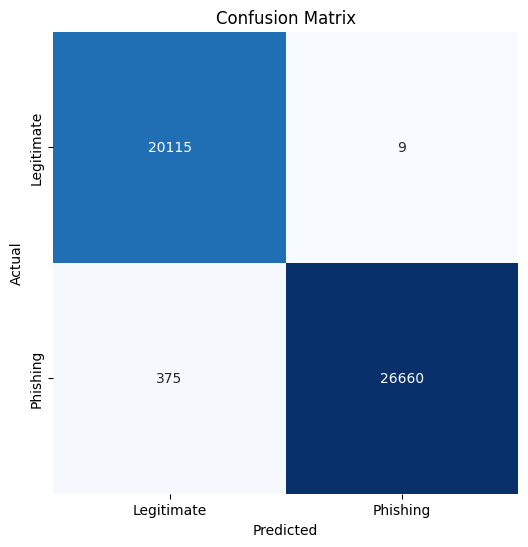

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 2. Plotting ROC Curve

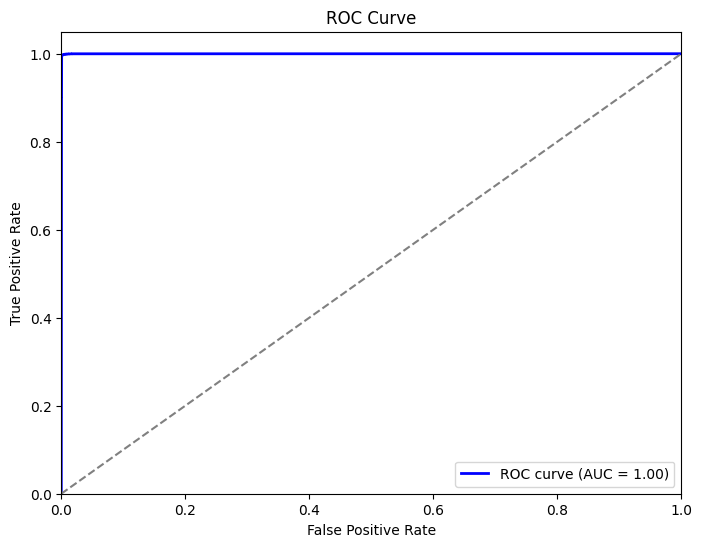

In [13]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 3. Plotting Chart for Top 10 Imporant Features

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


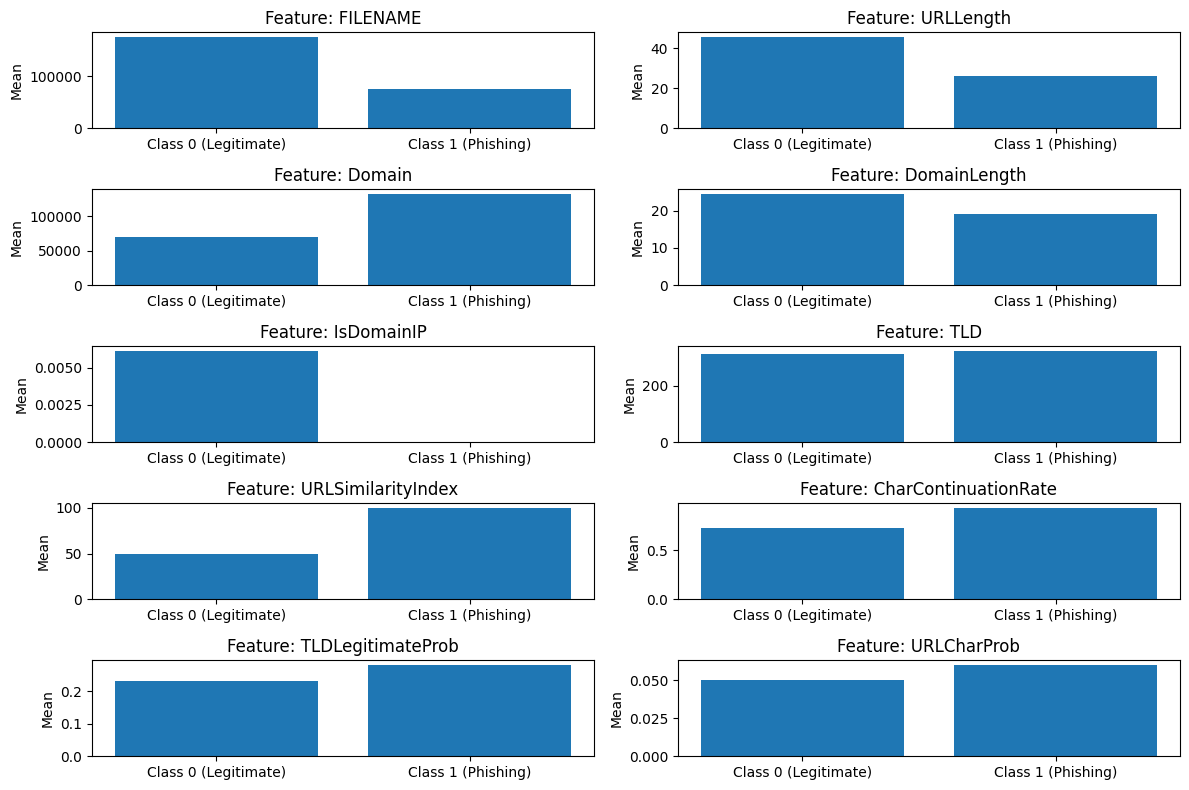

In [14]:
# For GaussianNB, we can visualize the mean and variance of each feature for both classes.
import numpy as np

# Get the feature names (columns)
features = X.columns

# Get the means and variances for each feature and class
means = best_model.theta_
variances = best_model.sigma_

# Plot the means and variances for the first few features
num_features = 10  # Number of features to plot
plt.figure(figsize=(12, 8))

for i in range(num_features):
    plt.subplot(5, 2, i+1)
    plt.title(f"Feature: {features[i]}")
    plt.bar(['Class 0 (Legitimate)', 'Class 1 (Phishing)'], means[:, i])
    plt.ylabel('Mean')
    
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d16dae6-23a0-4de8-8dec-da0f0eb28c7f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>